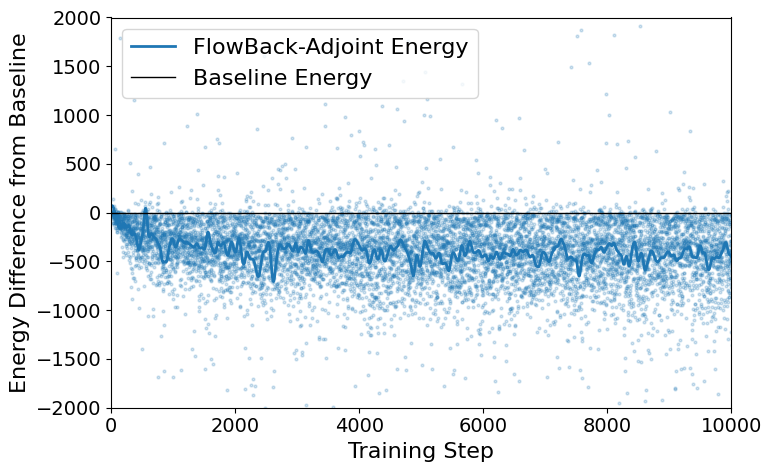

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import convolve
from pathlib import Path
import matplotlib
matplotlib.rcParams['font.size'] = 16
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14)

# --- helpers ---------------------------------------------------------------
kernel_size = 300
kernel = np.exp(-(np.arange(-kernel_size, kernel_size + 1) ** 2)
                / (kernel_size * 2 ** 2))
kernel /= kernel.sum()

def is_float(x):
    if x is None:
        return False
    try:
        float(x)
        return True
    except ValueError:
        return False

def load_energy_file(stem):
    """Read *.out* file and return a 1-D numpy array of floats."""
    with open(f"{stem}.out") as fh:
        vals = [float(l.strip()) for l in fh if is_float(l.strip())]
    return np.asarray(vals)

# --- I/O: baseline + comparators ------------------------------------------
baseline_file = 'compare_n2503'     # <- NEW baseline
# other_files   = ['f03', 'f05', 'f10', 'r03', 'r05', 'r10', 'fl0', 'fl15', 'fl25', 'fl35', 'fl45']       # everything we still care about
other_files  = ['n2503']
if not Path(baseline_file + '.out').is_file():
    raise FileNotFoundError(f"Couldn’t find {baseline_file}.out")

baseline = load_energy_file(baseline_file)
others   = {stem: load_energy_file(stem) for stem in other_files}

# --- plotting --------------------------------------------------------------
thresh = 10_000
plt.figure(figsize=(8, 5))

for stem, trace in others.items():
    end = min(len(trace), len(baseline))
    diff = trace[:end] - baseline[:end]
    smooth = convolve(diff[np.abs(diff) < thresh], kernel, mode='reflect')

    xs = np.where(np.abs(diff) < thresh)[0]        # x-coords kept after threshold
    plt.plot(xs, smooth, lw=2, label='FlowBack-Adjoint Energy') # line
    plt.scatter(xs, diff[np.abs(diff) < thresh], s=4, alpha=0.2)

plt.axhline(0, color='k', lw=1, label='Baseline Energy')
plt.xlim(0, 10_000)
plt.ylim(-2_000, 2_000)
plt.xlabel('Training Step')
plt.ylabel('Energy Difference from Baseline')
plt.legend()
plt.tight_layout()
plt.show()


Text(0, 0.5, 'Adjoint Matching Loss')

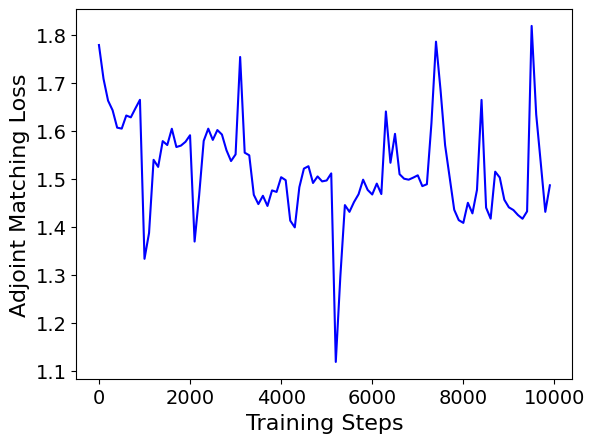

In [4]:
num =1500
# plt.plot(np.arange(100, num + 100, 100), np.load(f'jobs/n003_post/losses-epoch-0-step-{num}.npy'), color='cyan', label='lr=1e-5')
# plt.plot(np.arange(100, num + 100, 100), np.load(f'jobs/n005_post/losses-epoch-0-step-{num}.npy'), color='blue', label='lr=1e-6')
# plt.plot(np.arange(100, num + 100, 100), np.load(f'jobs/n010_post/losses-epoch-0-step-{num}.npy'), color='green', label='lr=1e-5')
plt.plot(np.arange(0, 10000, 100), np.load(f'jobs/n2503_post_bckup/losses-epoch-0-step-10000.npy'), color='blue', label='$\\sigma_p = ')
# plt.plot(np.arange(0, 10000, 100), np.load(f'jobs/n2505_post/losses-epoch-0-step-10000.npy'), color='red', label='GTT')
# plt.plot(np.arange(0, 10000, 100), np.load(f'jobs/n2510_post/losses-epoch-0-step-10000.npy'), color='blue', label='GTT')

# plt.plot(np.load(f'jobs/just_prb_post/losses-epoch-1-step-1800.npy'), color='blue', label='PRB')
plt.xlabel('Training Steps')
plt.ylabel('Adjoint Matching Loss')
# plt.ylim(0.5, 2)
# plt.legend()

In [9]:
np.load(f'jobs/lr5_post/losses-epoch-0-step-7000.npy')

array([1.56799779, 1.4586506 , 1.41082325, 1.34921117, 1.30464925,
       1.2920142 , 1.2821372 , 1.26546915, 1.25438607, 1.25099954,
       1.02470797, 0.97985584, 1.08430201, 1.06046139, 1.08276411,
       1.05146337, 1.09007906, 1.06453941, 1.06724214, 1.06091965,
       1.06588143, 0.93649513, 0.98787036, 1.04279627, 1.07775647,
       1.05155072, 1.05408498, 1.04278606, 1.02355481, 1.01806554,
       1.01995812, 1.06946546, 0.98933039, 0.97402459, 0.97507254,
       0.95340337, 0.95397862, 0.92951519, 0.95069435, 0.93976932,
       0.95991054, 0.95051899, 0.8261861 , 0.87443325, 0.93727455,
       0.93350075, 0.95474307, 0.9247305 , 0.92918354, 0.91570561,
       0.91110612, 0.91590762, 0.7489322 , 0.88763254, 0.94492662,
       0.96567991, 1.03698562, 1.11279559, 1.24539884, 1.33808072,
       1.49306106, 1.78220444, 1.98851293, 5.69659315, 5.78585546,
       6.43250539, 6.34333685, 6.47427234, 6.44118373, 6.42483933])

In [43]:
jobs/just_gtt_post/state-3830.pth
jobs/just_prb_post/state-4202.pth

NGLWidget()

In [66]:
from pymol import cmd

# -------------------------------------------------------------------
# 1.  File paths and object names
# -------------------------------------------------------------------
closed_big_model_path = "outputs/beta2/big_model_ckp-15_noise-0.003/frame_00004_1.pdb"
closed_lr5_path       = "outputs/beta2/lr5_post_ckp-2000_noise-0.003/frame_00004_1.pdb"
open_big_model_path   = "outputs/beta2/big_model_ckp-15_noise-0.003/frame_00001_1.pdb"
open_lr5_path         = "outputs/beta2/lr5_post_ckp-2000_noise-0.003/frame_00001_1.pdb"

objs = {
    "closed_big" : closed_big_model_path,
    "closed_lr5" : closed_lr5_path,
    "open_big"   : open_big_model_path,
    "open_lr5"   : open_lr5_path,
}

# --------------------------------------------------------------------
# 2.  Load & align everything (use closed_big as reference)
# --------------------------------------------------------------------
for name, path in objs.items():
    cmd.load(path, name)

cmd.align("open_big",   "closed_big")
cmd.align("closed_lr5", "closed_big")
cmd.align("open_lr5",   "closed_big")

# --------------------------------------------------------------------
# 3.  Define the locking residues once (138 & 403)
# --------------------------------------------------------------------
cmd.select("lock", "resi 138+403")
for name in objs:
    cmd.select(f"lock_{name}", f"{name} and lock")

cmd.set("stick_radius", 0.15)          # slimmer sticks look clean

# --------------------------------------------------------------------
# 4.  Helper: build & save one figure   (UPDATED)
# --------------------------------------------------------------------
def make_png(filename,
             show_cartoons,
             show_locks=(),
             cartoon_colours="gray",           # str or {obj: colour}
             stick_colour="red",
             padding=30,
             width=800, height=600, dpi=50):
    """
    Builds one figure and writes it to <filename>.

    The camera is oriented on the lock residues if they are provided;
    otherwise it is oriented on everything that is shown.
    """
    cmd.reinitialize("store")           # reset visuals but keep coords
    cmd.hide("everything", "all")

    # --- ribbons -----------------------------------------------------
    for obj in show_cartoons:
        cmd.show("cartoon", obj)

        # decide ribbon colour
        col = (cartoon_colours.get(obj, "gray")
               if isinstance(cartoon_colours, dict)
               else cartoon_colours)

        cmd.set("cartoon_color", col, obj)     # lock ribbon tint
        cmd.color(col, f"{obj} and not lock")  # colour non-lock atoms too

    # cmd.set("cartoon_transparency", )       # see-through ribbons

    # --- locking sticks ----------------------------------------------
    lock_sel_union = None
    if show_locks:
        lock_sel_union = " or ".join(show_locks)
        cmd.show("sticks", lock_sel_union)
        cmd.color(stick_colour, lock_sel_union)

    # --- view ---------------------------------------------------------
    # If locks exist, centre on them; else centre on everything visible
    focus = lock_sel_union if lock_sel_union else "visible"
    cmd.orient(focus)
    cmd.zoom(focus, padding)

    cmd.ray(width, height)
    cmd.png(filename, width=width, height=height, dpi=dpi)
    print(f"✓  {filename}")

# --------------------------------------------------------------------
# 5.  Build the three requested figures
# --------------------------------------------------------------------
# 5a. Overlay: open vs closed (big model), blue / orange
# make_png("states_overlay.png",
#          show_cartoons = ["closed_big", "open_big"],
#          cartoon_colours = {"closed_big": "blue", "open_big": "orange"},
#          show_locks = ())

# 5b. Open state: big vs LR5, grey ribbons, red sticks
make_png("open_state_models.png",
         show_cartoons = ["open_big", "open_lr5"],
         cartoon_colours = "gray",
         show_locks = ["lock_open_big", "lock_open_lr5"])

# 5c. Closed state: big vs LR5, grey ribbons, red sticks
make_png("closed_state_models.png",
         show_cartoons = ["closed_big", "closed_lr5"],
         cartoon_colours = "gray",
         show_locks = ["lock_closed_big", "lock_closed_lr5"])

print("All images finished.")

 Ray: render time: 40.17 sec. = 89.6 frames/hour (1405.06 sec. accum.).
✓  open_state_models.png


KeyboardInterrupt: 

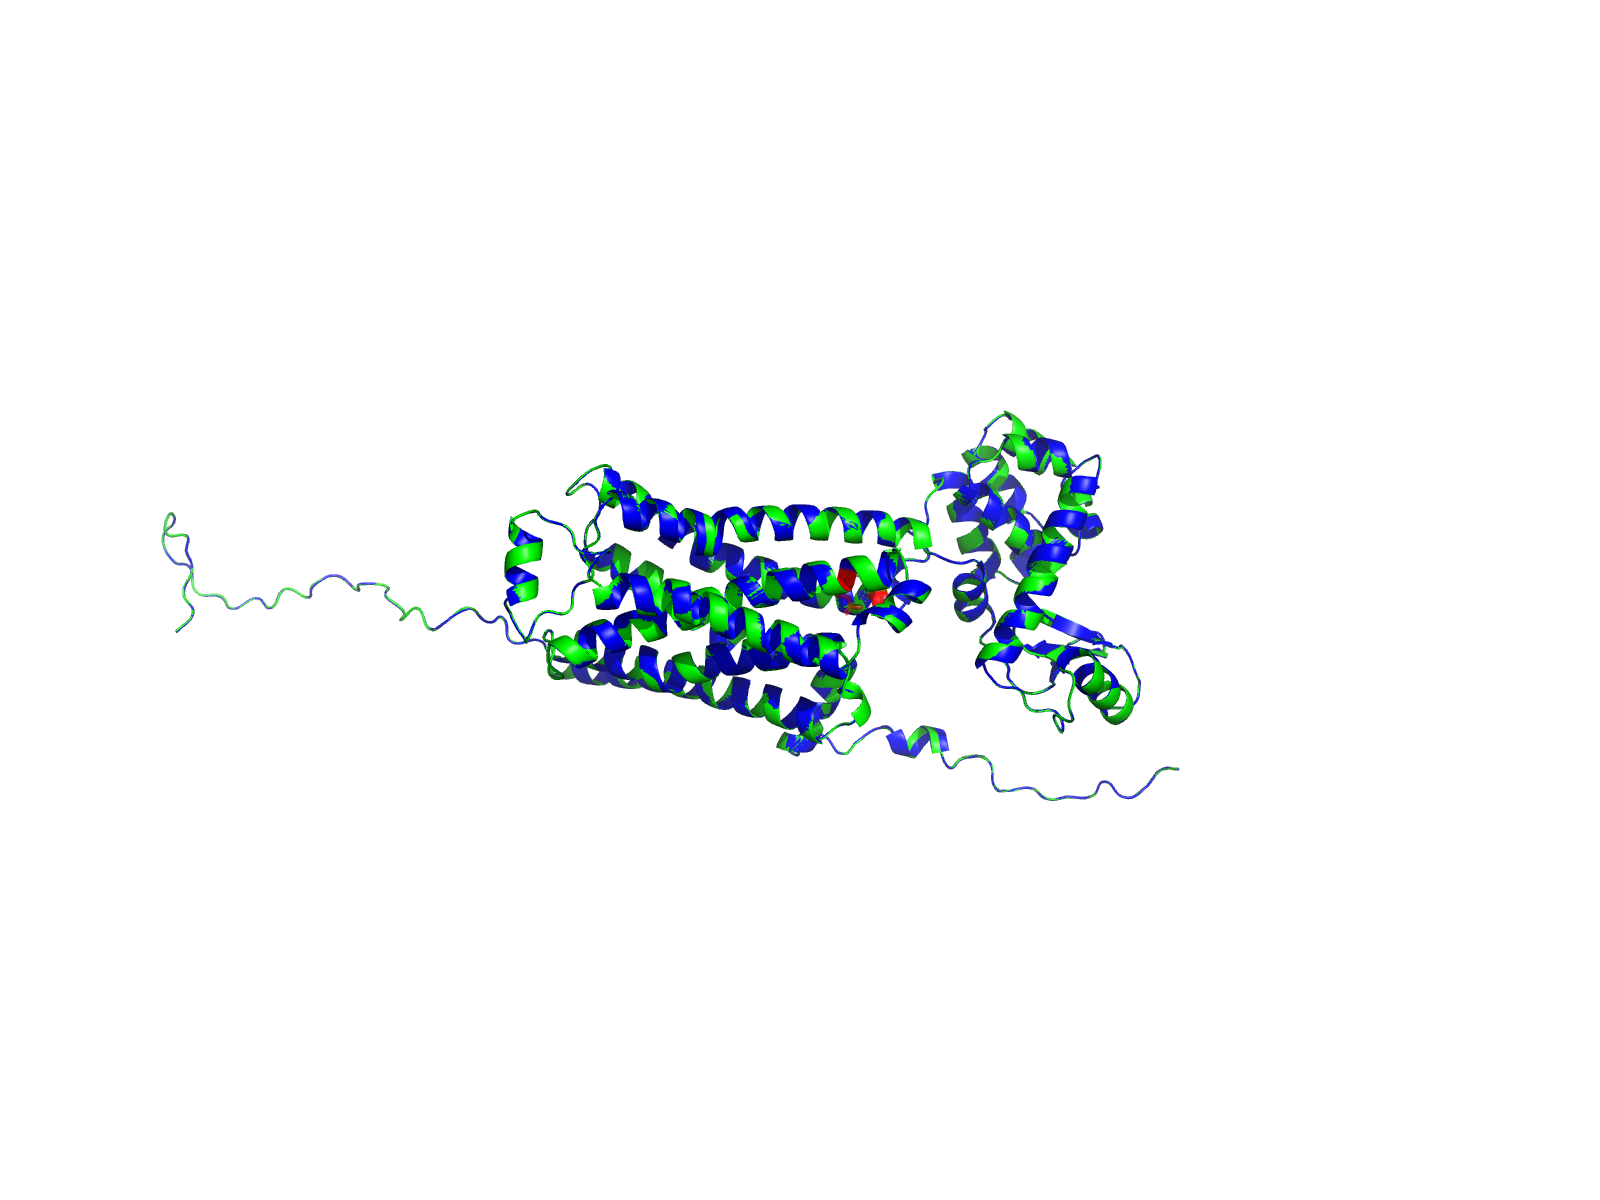

In [58]:
from IPython.display import Image
Image("closed_state_models.png")

NGLWidget(max_frame=842)

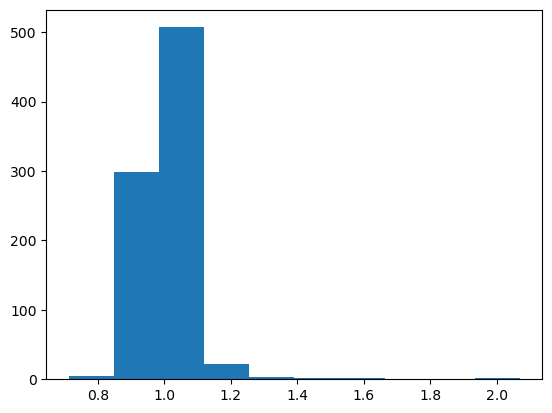

In [27]:
import mdtraj as md, nglview as nv
import matplotlib.pyplot as plt

traj = md.load('../beta2/samples.xtc', top='../beta2/topology.pdb')
tm1_idxs = 'resSeq 37 to 68 and protein'     # TM1
tm2_idxs = 'resSeq 74 to 104 and protein'    # TM2
tm3_idxs = 'resSeq 113 to 146 and protein'   # TM3
tm4_idxs = 'resSeq 159 to 185 and protein'   # TM4
tm5_idxs = 'resSeq 205 to 234 and protein'   # TM5
tm6_idxs = 'resSeq 395 to 433 and protein'   # TM6  (after T4-Lys insertion)
tm7_idxs = 'resSeq 436 to 469 and protein'   # TM7
tm1 = traj.atom_slice(traj.top.select(tm1_idxs))
tm2 = traj.atom_slice(traj.top.select(tm2_idxs))
tm3 = traj.atom_slice(traj.top.select(tm3_idxs))
tm4 = traj.atom_slice(traj.top.select(tm4_idxs))
tm5 = traj.atom_slice(traj.top.select(tm5_idxs))
tm6 = traj.atom_slice(traj.top.select(tm6_idxs))
tm7 = traj.atom_slice(traj.top.select(tm7_idxs))
view = nv.NGLWidget()
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'purple', 'black']
selection = traj.top.select('(resSeq 141 or resSeq 406)')
selection_c = traj.top.select('(resSeq 141 or resSeq 406) and name CA')
dists = md.compute_distances(traj, [[selection_c[0], selection_c[1]]])
plt.hist(dists)
for i, tm in enumerate([tm1, tm2, tm3, tm4, tm5, tm6, tm7]):
    a = view.add_trajectory(tm)
    a.clear_representations()
    a.add_representation('ribbon', color=colors[i])
a = view.add_trajectory(traj.atom_slice(selection))
a.clear_representations()
a.add_representation('ball+stick')
view

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


array([-19301.47256514, -19371.158298  , -19068.19851805, ...,
       -19863.1445079 , -15921.92129772, -19617.16722432])